In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

In [2]:
df = pd.read_csv('NY property data.csv')
df_copy = df.copy()

In [3]:
df.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


## Step 1 - Clean The Data/Fill In the Missing Data

##### Let's See Which Columns Are MIssing

In [4]:
#Let's see where the data is empty
df.describe()

,RECORD,B,BLOCK,LOT,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,...,EXTOT,EXCD1,ZIP,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.014730e+06,1.070994e+06,1.070994e+06,1.070994e+06,...,1.070994e+06,638488.000000,1.041104e+06,1.070994e+06,1.070994e+06,2.827260e+05,2.827320e+05,8.744900e+04,1.308280e+05,92948.000000
mean,5.354975e+05,3.215427e+00,4.757239e+03,3.647221e+02,3.663530e+01,8.886159e+01,5.006918e+00,8.742645e+05,8.506792e+04,2.272382e+05,...,9.118698e+04,1602.014232,1.092396e+04,2.304277e+01,3.992284e+01,2.462357e+05,7.139114e+05,3.512357e+05,6.567683e+05,1364.041679
std,3.091695e+05,1.201197e+00,3.676579e+03,8.532152e+02,7.403284e+01,7.639628e+01,8.365707e+00,1.158243e+07,4.057260e+06,6.877529e+06,...,6.508403e+06,1384.226741,5.284208e+02,3.557970e+01,4.270715e+01,6.178963e+06,1.165253e+07,1.080221e+07,1.607251e+07,1094.705653
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1010.000000,1.000100e+04,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,7.000000e+00,1011.000000
25%,2.677492e+05,3.000000e+00,1.555000e+03,2.300000e+01,1.900000e+01,8.000000e+01,2.000000e+00,3.040000e+05,9.180000e+03,1.837400e+04,...,0.000000e+00,1017.000000,1.031400e+04,1.500000e+01,2.600000e+01,5.705000e+03,3.391200e+04,2.090000e+03,2.870000e+03,1017.000000
50%,5.354975e+05,3.000000e+00,4.047000e+03,4.900000e+01,2.500000e+01,1.000000e+02,2.000000e+00,4.470000e+05,1.367800e+04,2.534000e+04,...,1.620000e+03,1017.000000,1.121400e+04,2.000000e+01,3.900000e+01,2.014500e+04,7.996250e+04,3.048000e+03,3.706200e+04,1017.000000
75%,8.032458e+05,4.000000e+00,6.898000e+03,1.430000e+02,4.000000e+01,1.000000e+02,3.000000e+00,6.190000e+05,1.974000e+04,4.543800e+04,...,2.090000e+03,1017.000000,1.136400e+04,2.400000e+01,5.000000e+01,6.264000e+04,2.405510e+05,3.177900e+04,1.068408e+05,1017.000000
max,1.070994e+06,5.000000e+00,1.635000e+04,9.978000e+03,9.999000e+03,9.999000e+03,1.190000e+02,6.150000e+09,2.668500e+09,4.668309e+09,...,4.668309e+09,7170.000000,3.380300e+04,7.575000e+03,9.393000e+03,2.371005e+09,4.501180e+09,2.371005e+09,4.501180e+09,7160.000000


In [5]:
#Amount Null in Each Row
df.isnull().sum(axis = 0)

RECORD            0
BBLE              0
B                 0
BLOCK             0
LOT               0
EASEMENT    1066358
OWNER         31745
BLDGCL            0
TAXCLASS          0
LTFRONT           0
LTDEPTH           0
EXT          716689
STORIES       56264
FULLVAL           0
AVLAND            0
AVTOT             0
EXLAND            0
EXTOT             0
EXCD1        432506
STADDR          676
ZIP           29890
EXMPTCL     1055415
BLDFRONT          0
BLDDEPTH          0
AVLAND2      788268
AVTOT2       788262
EXLAND2      983545
EXTOT2       940166
EXCD2        978046
PERIOD            0
YEAR              0
VALTYPE           0
dtype: int64

Lots of Columns with Missing Values That We Need to Fill in. The Ones That We Need to Focus On in this assignment are (ZIP, STORIES, FULLVAL, AVLAND, AVTOT, LTFRONT, LTDEPTH, BLDFRONT, BLDDEPTH)

#### Filling in NA Zip Codes

In [6]:
# Let's Tackle Missing Zip By Seeing How Much Are Missing
missing_zips = np.where(pd.isnull(df['ZIP']))[0]
len(missing_zips)

29890

In [7]:
#If the Zip Code Above is the same as the one Below It we Can Fill in the Missing Zip Code with those ones
for i in range(len(missing_zips)):
    if(df.loc[missing_zips[i]+1,'ZIP'] == df.loc[missing_zips[i]-1,'ZIP']):
        df.loc[missing_zips[i], 'ZIP'] = df.loc[missing_zips[i] - 1,'ZIP']

In [8]:
#Let's See How Much Are left
missing_zips = np.where(pd.isnull(df['ZIP']))[0]
len(missing_zips)

16437

In [9]:
#For The Rest Let's Fill in the Missing Zips with What's Above It
for i in range(len(missing_zips)):
    df.loc[missing_zips[i], 'ZIP'] = df.loc[missing_zips[i] - 1,'ZIP']

In [10]:
#Let's See If THere Are Any Left
missing_zips = np.where(pd.isnull(df['ZIP']))[0]
len(missing_zips)

0

#### Let's Go After Missing STORIES Column

In [11]:
null_stories = df[df['STORIES'].isnull()]
len(null_stories)

56264

In [12]:
#Let's See what the Values of Tax Class Are
null_stories['TAXCLASS'].value_counts()

1B    24736
4     22354
3      4635
2      3435
1       897
2C      138
2B       34
2A       30
1A        5
Name: TAXCLASS, dtype: int64

In [13]:
#No 0 Story Places
len(df[df['STORIES']==0])

0

In [14]:
#Lots Of Null Stories -- Grouping By TaxClass Might Be A Good Replacement for Stories
mean_stories = df.groupby('TAXCLASS')['STORIES'].mean()
mean_stories

TAXCLASS
1      2.111641
1A     1.656837
1B     4.000000
1C     3.052748
1D     1.068966
2     16.095110
2A     2.844574
2B     4.004494
2C     4.745097
3      1.333333
4      5.446968
Name: STORIES, dtype: float64

In [15]:
#Replpacing the Missing Stories with 0 and then filling them in with the average Tax Class Value
df['STORIES'] = df['STORIES'].fillna(value=0)
for index in mean_stories.index:
    df.loc[(df['STORIES']==0) & (df['TAXCLASS']==index),'STORIES'] = mean_stories[index]

#### Filling In Missing FULLVAL, AVLAND, and AVTOT

In [16]:
#Replace the Nans with 0 and grab the mean of the Taxclass for each FullVal that aren't 0
df['FULLVAL'].replace('NaN',0)
FULLVALnotnull = df[df['FULLVAL']!=0]
mean_fullval = FULLVALnotnull.groupby('TAXCLASS')['FULLVAL'].mean()
mean_fullval

TAXCLASS
1     5.698435e+05
1A    3.352842e+05
1B    5.613639e+05
1C    7.615359e+05
1D    2.233614e+07
2     7.998018e+05
2A    8.640037e+05
2B    1.252989e+06
2C    7.728799e+05
3     1.112765e+05
4     3.211928e+06
Name: FULLVAL, dtype: float64

In [17]:
#Doing the Same with AVLAND and AVTOT
df['AVLAND'].replace('NaN',0)
AVLANDnotnull = df[df['AVLAND']!=0]
mean_avland = AVLANDnotnull.groupby('TAXCLASS')['AVLAND'].mean()
df['AVTOT'].replace('NaN',0)
AVTOTnotnull = df[df['AVTOT']!=0]
mean_avtot = AVTOTnotnull.groupby('TAXCLASS')['AVTOT'].mean()

In [18]:
#Replacing the zero values with average Tax Class
for index in mean_fullval.index:
    df.loc[(df['FULLVAL']==0)&(df['TAXCLASS']==index),'FULLVAL'] = mean_fullval[index]
    df.loc[(df['AVLAND']==0)&(df['TAXCLASS']==index),'AVLAND'] = mean_avland[index]
    df.loc[(df['AVTOT']==0)&(df['TAXCLASS']==index),'AVTOT'] = mean_avtot[index]

#### Filling Out the Missing Lot and Building Sizes

In [19]:
#These 4 Valeus don't have NAs, we just need to replace the 0's
# We will first convert the 0's to NAs so not used in calculating mean when replacing them
df.loc[df['LTFRONT']==0,'LTFRONT']=np.nan
df.loc[df['LTDEPTH']==0,'LTDEPTH']=np.nan
df.loc[df['BLDFRONT']==0,'BLDFRONT']=np.nan
df.loc[df['BLDDEPTH']==0,'BLDDEPTH']=np.nan
df.loc[df['LTFRONT']==1,'LTFRONT']=np.nan
df.loc[df['LTDEPTH']==1,'LTDEPTH']=np.nan
df.loc[df['BLDFRONT']==1,'BLDFRONT']=np.nan
df.loc[df['BLDDEPTH']==1,'BLDDEPTH']=np.nan

In [20]:
# calculate mean now (mean function ignores NAs but not 0s hence we converted 0 to NA)
mean_LTFRONT=df.groupby(df['TAXCLASS'])['LTFRONT'].mean()
mean_LTDEPTH=df.groupby(df['TAXCLASS'])['LTDEPTH'].mean()
mean_BLDFRONT=df.groupby(df['TAXCLASS'])['BLDFRONT'].mean()
mean_BLDDEPTH=df.groupby(df['TAXCLASS'])['BLDDEPTH'].mean()

In [21]:
# impute values
for index in mean_LTFRONT.index:
    df.loc[(df['LTFRONT'].isnull())&(df['TAXCLASS']==index),'LTFRONT']=mean_LTFRONT[index]    
    df.loc[(df['LTDEPTH'].isnull())&(df['TAXCLASS']==index),'LTDEPTH']=mean_LTDEPTH[index]
    df.loc[(df['BLDFRONT'].isnull())&(df['TAXCLASS']==index),'BLDFRONT']=mean_BLDFRONT[index]
    df.loc[(df['BLDDEPTH'].isnull())&(df['TAXCLASS']==index),'BLDDEPTH']=mean_BLDDEPTH[index]

## Step 2 - Feature Extraction

In [22]:
#CODE FOR MAKING ZIP TO INTEGER RATHER THAN FLOAT
df['ZIP'] = df['ZIP'].astype(str)
df['zip3'] = df['ZIP'].str[:3]

In [23]:
#Making 3 new variables of lotsize,building size, and building volume as all three are important in property values
df['ltsize'] = df['LTFRONT'] * df['LTDEPTH']
df['bldsize'] = df['BLDFRONT'] * df['BLDDEPTH']
df['bldvol'] = df['bldsize'] * df['STORIES']

In [24]:
#Making different ratios as variables as they might be important in our model
df['r1'] = df['FULLVAL']/df['ltsize']
df['r2'] = df['FULLVAL']/df['bldsize']
df['r3'] = df['FULLVAL']/df['bldvol']
df['r4'] = df['AVLAND']/df['ltsize']
df['r5'] = df['AVLAND']/df['bldsize']
df['r6'] = df['AVLAND']/df['bldvol']
df['r7'] = df['AVTOT']/df['ltsize']
df['r8'] = df['AVTOT']/df['bldsize']
df['r9'] = df['AVTOT']/df['bldvol']

In [25]:
#We know for property in New York building size and volume is only relative to the area and type of building
ninevars = ['r1','r2','r3','r4','r5','r6','r7','r8','r9']
zip5_mean = df.groupby('ZIP')[ninevars].mean()
zip3_mean = df.groupby('zip3')[ninevars].mean()
taxclass_mean = df.groupby('TAXCLASS')[ninevars].mean()
borough_mean = df.groupby('B')[ninevars].mean()

In [26]:
zip3_mean

,r1,r2,r3,r4,r5,r6,r7,r8,r9
zip3,,,,,,,,,
100,364.834812,561.246883,140.838069,35.184407,65.191091,23.001569,95.178861,147.749020,34.932411
101,355.240500,520.644864,123.542516,25.843011,37.797672,9.438080,76.291176,99.056710,18.631263
102,41.567064,106.831608,5.093253,3.486809,19.531704,0.918801,18.706082,48.076229,2.292332
103,154.291165,467.905539,255.702949,10.640202,22.034075,12.709975,23.293061,35.152971,19.947559
104,134.694489,394.570278,197.213128,5.923620,21.400718,13.486978,15.864774,43.251837,22.513383
108,77.767564,456.449412,272.742277,1.818368,14.920574,8.883475,2.791397,23.320650,14.273953
110,126.384357,577.511226,358.502529,5.047582,25.701416,15.427514,8.462647,43.783839,25.230981
111,217.571105,520.169474,246.340266,9.193308,24.938358,14.317982,24.744079,54.637276,26.713959
112,243.939404,585.017431,265.918681,7.646035,20.194077,9.968826,18.377752,41.329347,18.467381


In [27]:
df = df.join(zip5_mean, on='ZIP', rsuffix='_zip5')
df = df.join(zip3_mean, on='zip3', rsuffix='_zip3')
df = df.join(taxclass_mean, on='TAXCLASS', rsuffix='_taxclass')
df = df.join(borough_mean, on='B', rsuffix='_boro')
df.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,...,111.778869,355.683369,547.530191,136.667291,33.914229,62.754354,21.822753,92.255104,142.901642,33.360015
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,...,111.778869,355.683369,547.530191,136.667291,33.914229,62.754354,21.822753,92.255104,142.901642,33.360015
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,...,111.778869,355.683369,547.530191,136.667291,33.914229,62.754354,21.822753,92.255104,142.901642,33.360015
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,...,111.778869,355.683369,547.530191,136.667291,33.914229,62.754354,21.822753,92.255104,142.901642,33.360015
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,...,111.778869,355.683369,547.530191,136.667291,33.914229,62.754354,21.822753,92.255104,142.901642,33.360015


In [28]:
#Making 36 more variables
rsuffix = ['_zip5','_zip3','_taxclass','_boro']
for var in ninevars:
    for r in rsuffix:
        df[str(var)+r] = df[var]/df[str(var)+r]

## Step 3 Calculating the Basic Statistical Properites of These 45 Variables

In [29]:
#Calculating Basic Statistics of Variables
filter_col = [col for col in df if col.startswith('r')]
stats = df[filter_col]
stats_describe = stats.describe().transpose()
stats_describe.to_csv('stats_on_vars.csv')

# Step 4 PCA Analysis

In [30]:
#Z-Scale the Variables Before PCA
df_for_z_scale = stats.copy()
df_for_z_scale.columns

Index(['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r1_zip5',
       'r2_zip5', 'r3_zip5', 'r4_zip5', 'r5_zip5', 'r6_zip5', 'r7_zip5',
       'r8_zip5', 'r9_zip5', 'r1_zip3', 'r2_zip3', 'r3_zip3', 'r4_zip3',
       'r5_zip3', 'r6_zip3', 'r7_zip3', 'r8_zip3', 'r9_zip3', 'r1_taxclass',
       'r2_taxclass', 'r3_taxclass', 'r4_taxclass', 'r5_taxclass',
       'r6_taxclass', 'r7_taxclass', 'r8_taxclass', 'r9_taxclass', 'r1_boro',
       'r2_boro', 'r3_boro', 'r4_boro', 'r5_boro', 'r6_boro', 'r7_boro',
       'r8_boro', 'r9_boro'],
      dtype='object')

In [31]:
#Z-Scaling Variables
df_for_z_scale = (df_for_z_scale - df_for_z_scale.mean()) / df_for_z_scale.std()
df_for_z_scale

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,...,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
0,-0.255761,1.391255,0.298531,-0.016532,0.733160,0.191155,-0.032729,1.279582,0.410407,-0.316187,...,0.239674,-0.291407,1.378940,0.423640,-0.035493,0.353823,0.146368,-0.069324,0.464675,0.328655
1,80.032072,14.476590,4.049227,22.085202,2.552784,0.699158,89.652154,11.941798,3.980206,45.870785,...,3.246255,49.308730,14.368584,4.673052,5.392397,1.275732,0.561827,22.564714,4.551318,3.292858
2,0.075242,-0.120576,-0.108520,0.483982,0.070334,0.028791,0.337016,0.047709,0.022988,-0.125772,...,-0.086621,-0.086920,-0.121835,-0.037535,0.087427,0.018003,0.013581,0.023990,-0.007480,0.006960
3,-0.182636,0.126486,0.113608,0.133577,0.303320,0.231186,0.048955,0.249021,0.234403,-0.274121,...,0.091438,-0.246232,0.123420,0.214128,0.001372,0.136044,0.179106,-0.048709,0.069679,0.182510
4,0.685581,22.822842,35.829707,1.602135,24.336380,37.030788,1.018790,18.742506,34.227910,0.225337,...,28.721692,0.290135,22.653802,40.679265,0.362030,12.312361,30.274899,0.196051,7.157913,28.409205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070989,-0.225916,0.008174,-0.016410,-0.050435,-0.010249,-0.010127,-0.089175,-0.020663,-0.015748,-0.203210,...,-0.023464,-0.199458,0.046719,-0.012624,-0.037752,-0.005007,-0.011460,-0.074566,-0.006366,-0.015733
1070990,-0.259410,0.047823,0.008352,-0.058047,-0.017861,-0.014757,-0.097296,-0.029962,-0.022531,-0.257677,...,-0.067479,-0.247157,0.092776,0.002370,-0.043710,-0.015991,-0.017961,-0.082683,-0.020855,-0.025153
1070991,-0.267365,0.035433,0.042528,-0.056010,-0.009614,-0.006751,-0.095318,-0.020651,-0.011496,-0.270615,...,0.004123,-0.258488,0.078383,0.023065,-0.042116,-0.004091,-0.006718,-0.080706,-0.006347,-0.009829
1070992,-0.202017,0.114053,0.103902,-0.051929,-0.010455,-0.007390,-0.089107,-0.017255,-0.008400,-0.164344,...,0.024213,-0.165421,0.169710,0.060230,-0.038922,-0.005304,-0.007616,-0.074498,-0.001056,-0.005529


In [32]:
#Fitting the PCA Analysis on the Data
pca = PCA(n_components = .99, svd_solver = 'full')
pca.fit(df_for_z_scale)

PCA(n_components=0.99, svd_solver='full')

(0.0, 1.0)

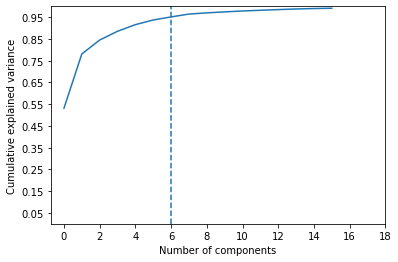

In [33]:
#Let's Look at the Scree Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.yticks(np.arange(0.05, 1.1, step=.1))
plt.xticks(np.arange(0, 20, step=2))
plt.axvline(x=6, linestyle='--')
plt.ylim(0,1)

The first 6 principal components explain 95% of the variation, so let's stick with the top 6 PC's and continue onwards

In [34]:
#Recomputing PCA with 6 principal components
pca = PCA(n_components = 6)
princ_comps = pca.fit_transform(df_for_z_scale)
data_pca = pd.DataFrame(princ_comps, columns = ['PC' + str(i) for i in range(1, pca.n_components_+1)])
data_pca.shape

(1070994, 6)

In [35]:
#Z-Scaling the PCA's
pca_mean = data_pca.mean()
pca_sd = data_pca.std()
data_pca = (data_pca - pca_mean) / pca_sd
data_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,-3.989942e-17,-1.535975e-15,-3.094295e-17,2.462300e-15,7.595088e-16,2.064367e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.473123e-01,-3.121770e+02,-4.693497e+02,-1.839580e+02,-3.911585e+02,-2.618060e+02
25%,-6.862403e-02,-9.947863e-02,-6.131605e-02,-1.448078e-01,-1.114988e-01,-7.018151e-02
50%,-1.944495e-02,-4.105365e-02,1.099321e-02,-2.396814e-02,-5.630884e-02,7.522093e-04
75%,1.192503e-02,2.033200e-02,1.500593e-01,5.505631e-02,3.222938e-02,1.235233e-01
max,5.229280e+02,6.036698e+02,6.141779e+02,3.898520e+02,4.478940e+02,4.230686e+02


# Step 5 - Creating The Two Fraud Algorithms

Model 1 is Calculating the Z-Score Outliers for Each property. I am using Euclidiean Distance to measure outliers

In [36]:
p=2
one_over_p = 1/p
score1 = (((data_pca).abs()**p).sum(axis=1))**one_over_p

Model 2 is Using an Autoencoder to Detect Compress the data to 3 dimensions and then back to six dimensions to see if the neural network can try to recreate the 6 variables based on what has entered it. Those it can't recreate as well will likely be given a higher error score. In this model I will also be using Euclidean distance to measure error

In [37]:
from keras.models import Model
from keras.layers import Input, Dense

In [38]:
# placeholder for input
data_in = Input(shape=(data_pca.shape[1],))
data_in

<tf.Tensor 'input_1:0' shape=(None, 6) dtype=float32>

In [39]:
# dimension of the encoded data. I am choosing 3
encoded_dim = 3

In [40]:
# encoded representation of the data
encoded = Dense(encoded_dim, activation='tanh')(data_in)

In [41]:
# reconstruction of the input
decoded = Dense(data_pca.shape[1],activation='tanh')(encoded)
# this model maps the input data to the reconstructed data
autoencoder = Model(data_in, decoded)

In [42]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
autoencoder.fit(data_pca,data_pca, epochs=5, shuffle=True, validation_data=(data_pca,data_pca))

Epoch 1/5
33469/33469 [==============================] - 45s 1ms/step - loss: 0.9351 - val_loss: 0.9295
Epoch 2/5
33469/33469 [==============================] - 43s 1ms/step - loss: 0.9288 - val_loss: 0.9281
Epoch 3/5
33469/33469 [==============================] - 42s 1ms/step - loss: 0.9280 - val_loss: 0.9277
Epoch 4/5
33469/33469 [==============================] - 43s 1ms/step - loss: 0.9278 - val_loss: 0.9272
Epoch 5/5
33469/33469 [==============================] - 45s 1ms/step - loss: 0.9278 - val_loss: 0.9272


In [44]:
#Spitting out the Predictions as pca_out
pca_out = autoencoder.predict(data_pca)
pca_out

array([[ 0.06142431, -0.3686181 , -0.43507272,  0.8427133 , -0.81602186,
        -0.5254573 ],
       [ 0.99807984,  0.9997231 , -0.9999956 ,  0.9999959 ,  0.99972177,
        -0.98779863],
       [-0.03627817,  0.01353586,  0.06701684, -0.14322938,  0.05927306,
         0.08820865],
       ...,
       [-0.07863986, -0.15369274,  0.08495711, -0.00367211, -0.25353724,
        -0.02240438],
       [-0.04262128, -0.13827226,  0.02018606,  0.07485309, -0.24707243,
        -0.10032383],
       [-0.02934364, -0.0810734 ,  0.01406172,  0.02933852, -0.1449748 ,
        -0.05697795]], dtype=float32)

In [45]:
#Subtracting the predcitions from the Autencoder from the regular PCA Matrix
pcadf = pd.DataFrame(pca_out)
error = pca_out - data_pca

In [46]:
p = 2
oop = 1/p
score2 = ((error.abs()**p).sum(axis=1))**oop
score2

0           0.854005
1          69.430297
2           0.122508
3           0.236230
4          41.414331
             ...    
1070989     0.044787
1070990     0.053609
1070991     0.059301
1070992     0.064109
1070993     0.028443
Length: 1070994, dtype: float64

## Step 6 Normalizing and Combining the Two Scores

In [47]:
#Normalizing Scores with extreme quantile binning and sorting them
scores = pd.DataFrame(score1)
scores.columns=['score1']
scores['score2'] = score2
scores['score1 rank'] = scores['score1'].rank()
scores['score2 rank'] = scores['score2'].rank()
scores['final'] = (scores['score1 rank'] + scores['score2 rank'])/2
top_records_20 = scores.sort_values(['final'], ascending = False).head(20)
top_records_100 = scores.sort_values(['final'], ascending = False).head(100)
top_20 = top_records_20[['score1 rank','score2 rank', 'final']]
top_100 = top_records_100[['score1 rank','score2 rank', 'final']]

In [48]:
#Grabbing the top 20 records from the original data
indexes = top_20.index
top_20_df = df_copy[df_copy.index.isin(indexes)]
top_20_merged = top_20_df.merge(top_20, left_index = True, right_index = True).sort_values('final',ascending=False)
top_20_merged.to_csv('Top_20_records.csv')

In [49]:
#Grabbing the top 100 records from the original data
indexes = top_100.index
top_100_df = df_copy[df_copy.index.isin(indexes)]
top_100_merged = top_100_df.merge(top_100, left_index = True, right_index = True).sort_values('final',ascending=False)
top_100_p1 = top_100_merged.copy()
top_100_merged.to_csv('Top_100_records.csv')

(0.1, 2141173.0413904563)

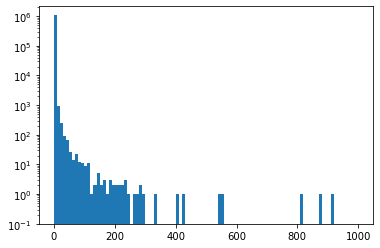

In [50]:
#Let's Look at the Scores
#This is Score1
plt.hist(score1,bins=100,range=(0,1000))
plt.yscale('log')
plt.ylim(ymin=0.1)

(0.1, 2141936.1023189197)

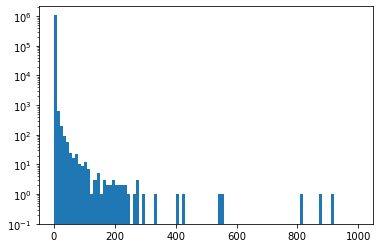

In [51]:
#This is Score1
plt.hist(score2,bins=100,range=(0,1000))
plt.yscale('log')
plt.ylim(ymin=0.1)

C:\Users\arjun\miniconda3\lib\site-packages\seaborn\distributions.py:2552: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='final', ylabel='Density'>

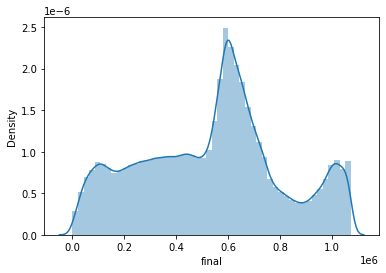

In [52]:
sns.distplot(scores['final'])

# Step 7 Analysis of Ratios/Variables

In [53]:
#Sorting top 200 values
top_records = scores.sort_values(['final'], ascending = False).head(200).index
print(top_records)

Int64Index([917941, 565391,  85885,  67128, 684703, 690832, 915468,  44247,
            565397,  39769,
            ...
            378959, 926191,  64268,      4, 987665,  89346, 643750,  54906,
            934766, 399073],
           dtype='int64', length=200)


In [54]:
#Let's look at some of the properties variables
data_zs_top_n = df_for_z_scale.iloc[top_records]
data_zs_top_n.transpose()

,917941,565391,85885,67128,684703,690832,915468,44247,565397,39769,...,378959,926191,64268,4,987665,89346,643750,54906,934766,399073
r1,0.535636,512.765210,-0.141711,81.640121,209.994955,0.796250,0.493989,0.549015,7.048056,1.762581,...,-0.240587,3.465175,34.956193,0.685581,-0.274734,9.573541,-0.312569,20.303367,-0.173332,-0.278341
r2,28.155462,328.137810,471.007306,466.558209,-0.159183,259.635741,70.819634,192.655103,175.165427,68.224138,...,12.023043,9.660670,22.233673,22.822842,15.820707,32.328508,19.024466,1.244574,23.548903,3.031441
r3,14.607118,93.955048,735.572763,133.630975,-0.138220,135.075906,27.566296,300.986032,50.108035,8.054577,...,3.022158,3.694674,0.470719,35.829707,12.365173,0.724849,29.899365,-0.081600,36.963294,2.381337
r4,15.196011,861.816504,0.231539,132.685538,20.610045,1.715713,0.119930,1.323284,12.310264,1.263718,...,-0.048068,0.532783,8.226577,1.602135,0.009325,3.230152,-0.054236,1.676901,0.179595,-0.008985
r5,323.460897,351.253292,501.836908,481.468505,-0.024656,264.186396,10.105426,196.409332,187.607419,27.756446,...,1.364555,0.961100,3.332680,24.336380,17.125594,6.872460,20.342133,0.050063,25.396693,2.801275
r6,163.953849,98.049397,763.158673,134.402892,-0.019945,133.907901,3.831221,298.699543,52.362728,3.228554,...,0.331561,0.354811,0.071252,37.030788,13.021876,0.162427,30.956797,-0.017234,38.643192,2.130488
r7,26.318384,573.033245,0.094670,91.448412,13.647789,1.142412,0.019575,0.866240,8.125941,2.221844,...,-0.015779,0.294116,39.300504,1.018790,-0.053923,10.947015,-0.096186,22.932681,0.059348,-0.057952
r8,641.545643,267.519796,383.932975,380.307754,-0.040397,211.702818,7.675449,157.125534,142.874565,55.736472,...,9.942595,0.710430,18.262439,18.742506,13.037014,26.487930,15.647507,1.160063,19.334117,2.616041
r9,389.987533,89.549858,700.222268,127.312210,-0.031106,128.687452,3.486722,286.595712,47.817592,7.792378,...,3.002673,0.311213,0.574290,34.227910,11.895073,0.816163,28.583589,0.048610,35.306824,2.392759
r1_zip5,1.492310,508.653468,-0.165887,33.568954,224.806257,0.840457,1.217900,0.231394,6.955144,0.764409,...,-0.250857,6.381628,39.169109,0.225337,-0.304078,4.788882,-0.347115,18.473250,-0.023778,-0.303638


In [55]:
#Joining the original columns back
NY_data_with_scores = df_copy.join(scores)
NY_data_with_scores.set_index('RECORD',inplace=True)
NY_data_with_scores.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,score1,score2,score1 rank,score2 rank,final
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,8613000.0,NaN,FINAL,2010/11,AC-TR,1.766122,0.854005,1049295.0,1053277.0,1051286.0
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,80690400.0,NaN,FINAL,2010/11,AC-TR,71.688601,69.430297,1070891.0,1070890.0,1070890.5
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,...,40179510.0,NaN,FINAL,2010/11,AC-TR,0.192736,0.122508,437097.0,905390.0,671243.5
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,...,15750000.0,NaN,FINAL,2010/11,AC-TR,0.342761,0.236230,703191.0,1007403.0,855297.0
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,...,107758350.0,NaN,FINAL,2010/11,AC-TR,42.431865,41.414331,1070800.0,1070801.0,1070800.5


In [56]:
#Sorting by average rank to rate top "fraudulent" records
NY_data_top_n = NY_data_with_scores.sort_values(['final'], ascending = False).head(200)
NY_data_top_n

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,score1,score2,score1 rank,score2 rank,final
RECORD,,,,,,,,,,,,,,,,,,,,,
917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910,0,...,4.501180e+09,NaN,FINAL,2010/11,AC-TR,918.967139,918.873831,1070994.0,1070994.0,1070994.0
565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117,108,...,8.484847e+08,NaN,FINAL,2010/11,AC-TR,871.086484,870.547279,1070993.0,1070993.0,1070993.0
85886,1012540010,1,1254,10,NaN,PARKS AND RECREATION,Q1,4,4000,150,...,2.826018e+07,NaN,FINAL,2010/11,AC-TR,812.139354,810.956576,1070992.0,1070992.0,1070992.0
67129,1011110001,1,1111,1,NaN,CULTURAL AFFAIRS,Q1,4,840,0,...,2.465055e+09,NaN,FINAL,2010/11,AC-TR,553.564742,551.777226,1070991.0,1070991.0,1070991.0
684704,4036590105,4,3659,105,NaN,W RUFERT,V0,1B,2,2,...,NaN,NaN,FINAL,2010/11,AC-TR,545.849403,543.821193,1070990.0,1070990.0,1070990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89347,1013081005,1,1308,1005,NaN,DAI-ICHI LIFE INVESTM,R5,4,200,325,...,NaN,NaN,FINAL,2010/11,AC-TR,42.366573,40.801573,1070799.0,1070800.0,1070799.5
643751,4023110250,4,2311,250,NaN,TR-ST PATRICKS CATHED,Z8,4,1712,2610,...,5.443200e+06,NaN,FINAL,2010/11,AC-TR,42.318987,40.146014,1070798.0,1070796.0,1070797.0
54907,1009440045,1,944,45,NaN,TISHMAN SPEYER ARCHST,D8,2,50,75,...,2.034162e+07,NaN,FINAL,2010/11,AC-TR,42.267936,40.255285,1070797.0,1070797.0,1070797.0


In [57]:
#Let's look at the ratios I've made
data_zs_top_n['RECORD'] = (data_zs_top_n.index + 1).astype(int)
data_zs_top_n.set_index('RECORD',inplace=True)
data_zs_top_n

C:\Users\arjun\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,...,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
RECORD,,,,,,,,,,,,,,,,,,,,,
917942,0.535636,28.155462,14.607118,15.196011,323.460897,163.953849,26.318384,641.545643,389.987533,1.492310,...,328.352098,0.783165,26.629905,7.710688,19.701153,379.852884,194.948448,45.398373,752.629322,444.211540
565392,512.765210,328.137810,93.955048,861.816504,351.253292,98.049397,573.033245,267.519796,89.549858,508.653468,...,75.315338,461.863588,304.868676,54.703561,938.887683,553.119217,175.573719,726.151150,354.612509,134.353747
85886,-0.141711,471.007306,735.572763,0.231539,501.836908,763.158673,0.094670,383.932975,700.222268,-0.165887,...,589.640208,-0.220949,467.560770,833.464564,0.025431,254.237338,624.123556,-0.037172,147.129115,581.421285
67129,81.640121,466.558209,133.630975,132.685538,481.468505,134.402892,91.448412,380.307754,127.312210,33.568954,...,107.119815,50.302149,463.144208,151.484805,32.554357,243.917715,109.908658,23.018041,145.739630,105.702266
684704,209.994955,-0.159183,-0.138220,20.610045,-0.024656,-0.019945,13.647789,-0.040397,-0.031106,224.806257,...,-0.000002,274.043849,-0.163587,-0.088594,26.708414,-0.027038,-0.025624,23.584205,-0.038468,-0.037462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89347,9.573541,32.328508,0.724849,3.230152,6.872460,0.162427,10.947015,26.487930,0.816163,4.788882,...,0.581413,5.780930,32.089954,0.906643,0.761850,3.464290,0.122873,2.701666,10.126600,0.665577
643751,-0.312569,19.024466,29.899365,-0.054236,20.342133,30.956797,-0.096186,15.647507,28.583589,-0.347115,...,23.967892,-0.323403,17.989455,15.799248,-0.036894,23.890365,36.807467,-0.077935,18.365578,32.555980
54907,20.303367,1.244574,-0.081600,1.676901,0.050063,-0.017234,22.932681,1.160063,0.048610,18.473250,...,0.822082,12.409591,1.233332,-0.007036,0.380392,0.007732,-0.024059,5.726524,0.418866,0.028235


In [58]:
#Saving some of the stats for the assignment
NY_data_top_n.to_csv('NY_top.csv', index=True)
data_zs_top_n.to_csv('data_zs_top.csv', index=True)

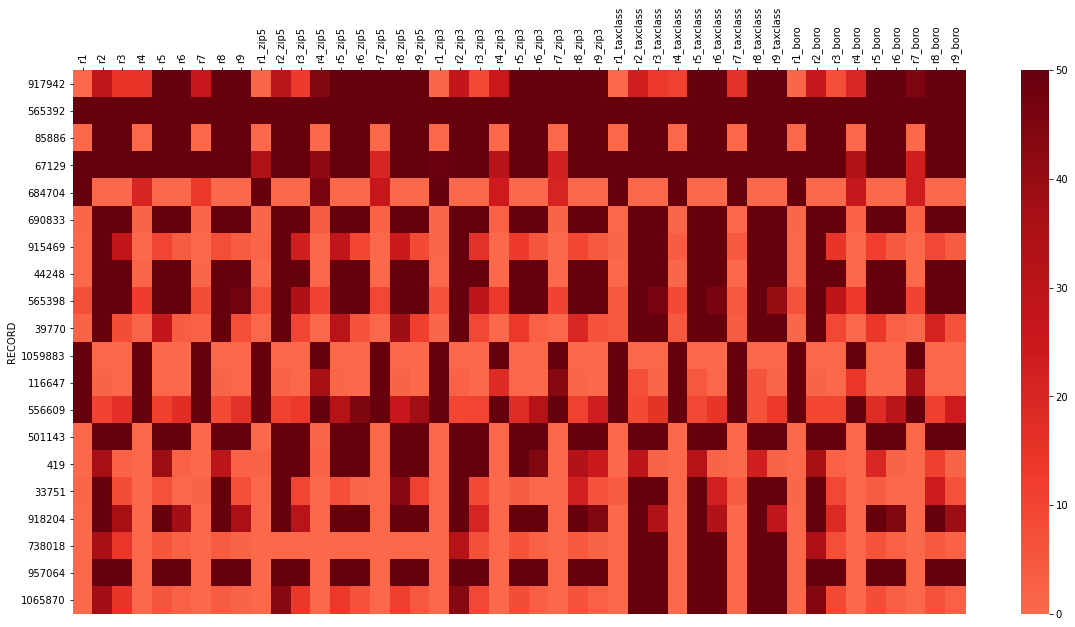

In [59]:
#Making heatmap of the ratios
data_zs_top_n_abs = data_zs_top_n.abs()
data_heatmap = data_zs_top_n.abs().head(20)
plt.rcParams['figure.figsize'] = (20,10)
ax = sns.heatmap(data_heatmap, center=0, vmin=0, vmax=50, cmap='Reds')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
plt.savefig('heatmap.png')

# Step 8 Changing Up Some Stuff and ReRunning

In [60]:
#Putting 8 PCA's instead of 6
pca = PCA(n_components = 8)
princ_comps = pca.fit_transform(df_for_z_scale)
data_pca = pd.DataFrame(princ_comps, columns = ['PC' + str(i) for i in range(1, pca.n_components_+1)])
data_pca.shape

(1070994, 8)

In [61]:
#Z-Scaling the PCA's
pca_mean = data_pca.mean()
pca_sd = data_pca.std()
data_pca = (data_pca - pca_mean) / pca_sd
data_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,-1.626761e-17,3.230964e-15,-2.504362e-16,6.811164e-16,1.807323e-15,4.907881e-16,-1.057394e-16,-2.124316e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.473123e-01,-3.121770e+02,-4.693497e+02,-1.839580e+02,-3.911585e+02,-2.618056e+02,-2.129464e+02,-2.261023e+02
25%,-6.862403e-02,-9.947863e-02,-6.131603e-02,-1.448078e-01,-1.114987e-01,-7.018116e-02,-1.120010e-01,-5.556738e-02
50%,-1.944495e-02,-4.105365e-02,1.099320e-02,-2.396820e-02,-5.630884e-02,7.532244e-04,4.433570e-03,1.525721e-02
75%,1.192503e-02,2.033200e-02,1.500593e-01,5.505629e-02,3.222937e-02,1.235224e-01,8.384101e-02,1.295503e-01
max,5.229280e+02,6.036698e+02,6.141779e+02,3.898520e+02,4.478940e+02,4.230685e+02,3.327262e+02,3.030399e+02


In [62]:
#Model 1 with p=4
p=4
one_over_p = 1/p
score1 = (((data_pca).abs()**p).sum(axis=1))**one_over_p

In [63]:
#Model 2 with 5 dimensions instead of 3 and 7 epochs instead of 5
data_in = Input(shape=(data_pca.shape[1],))
data_in

#Change
encoded_dim = 5
encoded = Dense(encoded_dim, activation='tanh')(data_in)
decoded = Dense(data_pca.shape[1],activation='tanh')(encoded)
autoencoder = Model(data_in, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

#Change
autoencoder.fit(data_pca,data_pca, epochs=8, shuffle=True, validation_data=(data_pca,data_pca))

Epoch 1/8
33469/33469 [==============================] - 49s 1ms/step - loss: 0.9243 - val_loss: 0.9174
Epoch 2/8
33469/33469 [==============================] - 47s 1ms/step - loss: 0.9170 - val_loss: 0.9170
Epoch 3/8
33469/33469 [==============================] - 50s 1ms/step - loss: 0.9167 - val_loss: 0.9163
Epoch 4/8
33469/33469 [==============================] - 41s 1ms/step - loss: 0.9163 - val_loss: 0.9162
Epoch 5/8
33469/33469 [==============================] - 51s 2ms/step - loss: 0.9164 - val_loss: 0.9161
Epoch 6/8
33469/33469 [==============================] - 45s 1ms/step - loss: 0.9160 - val_loss: 0.9160
Epoch 7/8
33469/33469 [==============================] - 42s 1ms/step - loss: 0.9165 - val_loss: 0.9158
Epoch 8/8
33469/33469 [==============================] - 41s 1ms/step - loss: 0.9162 - val_loss: 0.9156


In [64]:
#Continuing with the stuff
pca_out = autoencoder.predict(data_pca)
pca_out = autoencoder.predict(data_pca)
pcadf = pd.DataFrame(pca_out)
error = pca_out - data_pca

In [65]:
#Also keeping second model p at 3 to make it different
p = 3
oop = 1/p
score2 = ((error.abs()**p).sum(axis=1))**oop
score2

0           0.794205
1          62.971237
2           0.155580
3           0.262770
4          33.699769
             ...    
1070989     0.035638
1070990     0.049675
1070991     0.044471
1070992     0.054727
1070993     0.032005
Length: 1070994, dtype: float64

In [66]:
#Grabbing top 100 records
scores = pd.DataFrame(score1)
scores.columns=['score1']
scores['score2'] = score2
scores['score1 rank'] = scores['score1'].rank()
scores['score2 rank'] = scores['score2'].rank()
scores['final'] = (scores['score1 rank'] + scores['score2 rank'])/2
top_records_20 = scores.sort_values(['final'], ascending = False).head(20)
top_records_100 = scores.sort_values(['final'], ascending = False).head(100)
top_20 = top_records_20[['score1 rank','score2 rank', 'final']]
top_100 = top_records_100[['score1 rank','score2 rank', 'final']]

In [67]:
#Grabbing the top 100 records from the second version of the data
indexes = top_100.index
top_100_df = df_copy[df_copy.index.isin(indexes)]
top_100_merged = top_100_df.merge(top_100, left_index = True, right_index = True).sort_values('final',ascending=False)
top_100_p2 = top_100_merged.copy()
top_100_merged.to_csv('Top_100_records_second_run.csv')

In [68]:
top_100_p1_list = top_100_p1['RECORD'].to_numpy()
top_100_p2_list = top_100_p2['RECORD'].to_numpy()
top_100_p2_list

array([ 917942,  565392,   85886,  684704,   67129,  915469,  690833,
       1059883,   44248,  116647,     419,   39770,  565398,  106681,
        501143,   33751,  556609,  738018,  252834, 1065870,  957064,
        151044,   48221,  918204,  139726,  964934,  918858,  927227,
        104411,  932861,  915470,   19242,  771150,  985597,  752488,
        684563,  610682,   97084,  330291,  691879,   60469,  964948,
        720600,  245573,  934793,  109067,  649675,  556911,  248665,
        973912,   56136,  216948,  665158,  340900,   85884,  153070,
        773562,  177646,  131603,  991517,  464855,  621689,  918305,
        817349,  764312,  923883,   47984,  994813,  994815,  994817,
        994819,   86946,  917060,  638993,  209714,  451672,  209712,
        918205,  994821,  243059,  992071,  991783,  174539,   26243,
        398278,  918920,   12076,  934750,     428,   56134,  334957,
        773735,  116646,  330292,   79817,  259235,  398288,   23369,
          7054,    6

In [69]:
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
  
    if (a_set & b_set): 
        return(a_set & b_set) 
    else: 
        return("No common elements")  

In [70]:
list = common_member(top_100_p1_list,top_100_p2_list)
len(list)

93

In [71]:
top_records = scores.sort_values(['final'], ascending = False).head(200).index
print(top_records)

Int64Index([ 917941,  565391,   85885,  684703,   67128,  915468,  690832,
            1059882,   44247,  116646,
            ...
             987665,  900078,   77123,  106722,  991961,  986427,  986403,
             986425,  986417,  986419],
           dtype='int64', length=200)


# Step 9 Doing the Heatmap

In [72]:
top_records = scores.sort_values(['final'], ascending = False).head(200).index
print(top_records)

Int64Index([ 917941,  565391,   85885,  684703,   67128,  915468,  690832,
            1059882,   44247,  116646,
            ...
             987665,  900078,   77123,  106722,  991961,  986427,  986403,
             986425,  986417,  986419],
           dtype='int64', length=200)


In [73]:
data_zs_top_n = df_for_z_scale.iloc[top_records]
data_zs_top_n.transpose()

,917941,565391,85885,684703,67128,915468,690832,1059882,44247,116646,...,987665,900078,77123,106722,991961,986427,986403,986425,986417,986419
r1,0.535636,512.765210,-0.141711,209.994955,81.640121,0.493989,0.796250,192.216004,0.549015,128.360902,...,-0.274734,17.208923,5.041475,0.265972,34.063828,34.063828,34.063828,34.063828,34.063828,34.063828
r2,28.155462,328.137810,471.007306,-0.159183,466.558209,70.819634,259.635741,0.010762,192.655103,1.933488,...,15.820707,-0.159183,4.856625,20.255800,0.010762,0.010762,0.010762,0.010762,0.010762,0.010762
r3,14.607118,93.955048,735.572763,-0.138220,133.630975,27.566296,135.075906,-0.097165,300.986032,-0.070398,...,12.365173,-0.138220,0.073757,31.821827,-0.097165,-0.097165,-0.097165,-0.097165,-0.097165,-0.097165
r4,15.196011,861.816504,0.231539,20.610045,132.685538,0.119930,1.715713,134.407816,1.323284,57.266052,...,0.009325,1.660919,1.082508,0.804756,23.950690,23.950690,23.950690,23.950690,23.950690,23.950690
r5,323.460897,351.253292,501.836908,-0.024656,481.468505,10.105426,264.186396,0.079155,196.409332,0.585411,...,17.125594,-0.024656,0.662854,19.361854,0.079155,0.079155,0.079155,0.079155,0.079155,0.079155
r6,163.953849,98.049397,763.158673,-0.019945,134.402892,3.831221,133.907901,0.008570,298.699543,0.005005,...,13.021876,-0.019945,0.010192,29.466102,0.008570,0.008570,0.008570,0.008570,0.008570,0.008570
r7,26.318384,573.033245,0.094670,13.647789,91.448412,0.019575,1.142412,221.414912,0.866240,143.637487,...,-0.053923,1.044527,5.884507,0.550070,39.455228,39.455228,39.455228,39.455228,39.455228,39.455228
r8,641.545643,267.519796,383.932975,-0.040397,380.307754,7.675449,211.702818,0.160682,157.125534,1.721406,...,13.037014,-0.040397,4.103241,16.650825,0.160682,0.160682,0.160682,0.160682,0.160682,0.160682
r9,389.987533,89.549858,700.222268,-0.031106,127.312210,3.486722,128.687452,0.035790,286.595712,0.059271,...,11.895073,-0.031106,0.196474,30.413330,0.035790,0.035790,0.035790,0.035790,0.035790,0.035790
r1_zip5,1.492310,508.653468,-0.165887,224.806257,33.568954,1.217900,0.840457,315.781349,0.231394,84.637968,...,-0.304078,36.329680,49.329254,-0.048438,38.120535,38.120535,38.120535,38.120535,38.120535,38.120535


In [74]:
NY_data_with_scores = df_copy.join(scores)
NY_data_with_scores.set_index('RECORD',inplace=True)
NY_data_with_scores.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,score1,score2,score1 rank,score2 rank,final
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,8613000.0,NaN,FINAL,2010/11,AC-TR,1.437705,0.794205,1046684.0,1052538.0,1049611.0
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,80690400.0,NaN,FINAL,2010/11,AC-TR,56.552207,62.971237,1070884.0,1070889.0,1070886.5
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,...,40179510.0,NaN,FINAL,2010/11,AC-TR,0.419134,0.155580,958855.0,1001186.0,980020.5
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,...,15750000.0,NaN,FINAL,2010/11,AC-TR,0.364862,0.262770,926564.0,1030709.0,978636.5
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,...,107758350.0,NaN,FINAL,2010/11,AC-TR,31.657716,33.699769,1070724.0,1070728.0,1070726.0


In [75]:
NY_data_top_n = NY_data_with_scores.sort_values(['final'], ascending = False).head(200)
NY_data_top_n

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,score1,score2,score1 rank,score2 rank,final
RECORD,,,,,,,,,,,,,,,,,,,,,
917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910,0,...,4.501180e+09,NaN,FINAL,2010/11,AC-TR,695.176218,770.143993,1070994.0,1070994.0,1070994.0
565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117,108,...,8.484847e+08,NaN,FINAL,2010/11,AC-TR,665.789821,736.443068,1070993.0,1070993.0,1070993.0
85886,1012540010,1,1254,10,NaN,PARKS AND RECREATION,Q1,4,4000,150,...,2.826018e+07,NaN,FINAL,2010/11,AC-TR,609.692408,671.913832,1070992.0,1070992.0,1070992.0
684704,4036590105,4,3659,105,NaN,W RUFERT,V0,1B,2,2,...,NaN,NaN,FINAL,2010/11,AC-TR,458.769175,493.398192,1070991.0,1070991.0,1070991.0
67129,1011110001,1,1111,1,NaN,CULTURAL AFFAIRS,Q1,4,840,0,...,2.465055e+09,NaN,FINAL,2010/11,AC-TR,429.945602,474.949399,1070990.0,1070990.0,1070990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986428,5023720278E,5,2372,278,E,NaN,Z7,4,20,7,...,NaN,NaN,FINAL,2010/11,AC-TR,37.650731,39.978221,1070797.0,1070797.0,1070797.0
986404,5023720264E,5,2372,264,E,NaN,Z7,4,20,7,...,NaN,NaN,FINAL,2010/11,AC-TR,37.650731,39.978221,1070797.0,1070797.0,1070797.0
986426,5023720277E,5,2372,277,E,NaN,Z7,4,20,7,...,NaN,NaN,FINAL,2010/11,AC-TR,37.650731,39.978221,1070797.0,1070797.0,1070797.0


In [76]:
data_zs_top_n['RECORD'] = (data_zs_top_n.index + 1).astype(int)
data_zs_top_n.set_index('RECORD',inplace=True)
data_zs_top_n

C:\Users\arjun\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,...,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
RECORD,,,,,,,,,,,,,,,,,,,,,
917942,0.535636,28.155462,14.607118,15.196011,323.460897,163.953849,26.318384,641.545643,389.987533,1.492310,...,328.352098,0.783165,26.629905,7.710688,19.701153,379.852884,194.948448,45.398373,752.629322,444.211540
565392,512.765210,328.137810,93.955048,861.816504,351.253292,98.049397,573.033245,267.519796,89.549858,508.653468,...,75.315338,461.863588,304.868676,54.703561,938.887683,553.119217,175.573719,726.151150,354.612509,134.353747
85886,-0.141711,471.007306,735.572763,0.231539,501.836908,763.158673,0.094670,383.932975,700.222268,-0.165887,...,589.640208,-0.220949,467.560770,833.464564,0.025431,254.237338,624.123556,-0.037172,147.129115,581.421285
684704,209.994955,-0.159183,-0.138220,20.610045,-0.024656,-0.019945,13.647789,-0.040397,-0.031106,224.806257,...,-0.000002,274.043849,-0.163587,-0.088594,26.708414,-0.027038,-0.025624,23.584205,-0.038468,-0.037462
67129,81.640121,466.558209,133.630975,132.685538,481.468505,134.402892,91.448412,380.307754,127.312210,33.568954,...,107.119815,50.302149,463.144208,151.484805,32.554357,243.917715,109.908658,23.018041,145.739630,105.702266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986428,34.063828,0.010762,-0.097165,23.950690,0.079155,0.008570,39.455228,0.160682,0.035790,38.120535,...,-0.075839,48.634271,0.049725,-0.061525,18.749719,0.124000,0.014795,39.452234,0.276188,0.055836
986404,34.063828,0.010762,-0.097165,23.950690,0.079155,0.008570,39.455228,0.160682,0.035790,38.120535,...,-0.075839,48.634271,0.049725,-0.061525,18.749719,0.124000,0.014795,39.452234,0.276188,0.055836
986426,34.063828,0.010762,-0.097165,23.950690,0.079155,0.008570,39.455228,0.160682,0.035790,38.120535,...,-0.075839,48.634271,0.049725,-0.061525,18.749719,0.124000,0.014795,39.452234,0.276188,0.055836


In [77]:
NY_data_top_n.to_csv('NY_top.csv', index=True)
data_zs_top_n.to_csv('data_zs_top.csv', index=True)

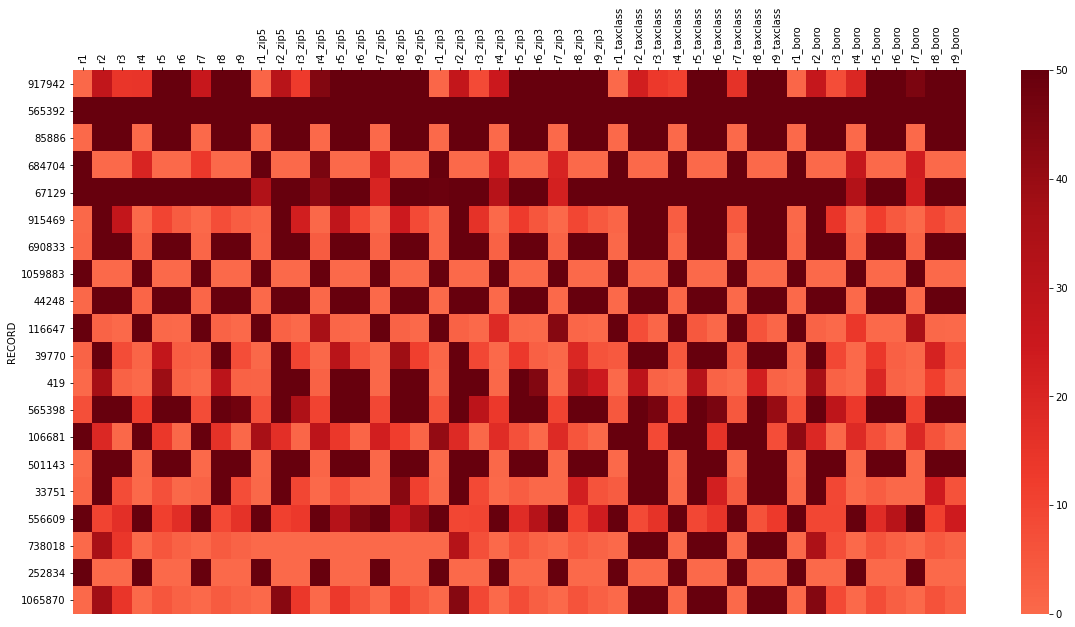

In [78]:
data_zs_top_n_abs = data_zs_top_n.abs()
data_heatmap = data_zs_top_n.abs().head(20)
plt.rcParams['figure.figsize'] = (20,10)
ax = sns.heatmap(data_heatmap, center=0, vmin=0, vmax=50, cmap='Reds')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
plt.savefig('heatmap.png')